In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

clean_start = pd.read_csv("Resources/U.S._Chronic_Disease_Indicators.csv")

clean_start.head()

,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
0,2015,AK,Alaska,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,22,NaN,19.7,24.5,Overall,Overall,"(64.84507995700051, -147.72205903599973)"
1,2015,AL,Alabama,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,30.7,NaN,27.3,34.3,Overall,Overall,"(32.84057112200048, -86.63186076199969)"
2,2015,AR,Arkansas,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,27.6,NaN,24.5,30.8,Overall,Overall,"(34.74865012400045, -92.27449074299966)"
3,2015,AZ,Arizona,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,34.8,NaN,29.7,40.2,Overall,Overall,"(34.865970280000454, -111.76381127699972)"
4,2015,CA,California,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,28.9,NaN,23.6,34.7,Overall,Overall,"(37.63864012300047, -120.99999953799971)"


In [2]:
# Clean data a tiny bit further
cleaned_prev_df = clean_start.loc[(clean_start["DataValueType"] == "Crude Prevalence"),:]

cleaned_prev_df

,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
0,2015,AK,Alaska,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,22,NaN,19.7,24.5,Overall,Overall,"(64.84507995700051, -147.72205903599973)"
1,2015,AL,Alabama,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,30.7,NaN,27.3,34.3,Overall,Overall,"(32.84057112200048, -86.63186076199969)"
2,2015,AR,Arkansas,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,27.6,NaN,24.5,30.8,Overall,Overall,"(34.74865012400045, -92.27449074299966)"
3,2015,AZ,Arizona,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,34.8,NaN,29.7,40.2,Overall,Overall,"(34.865970280000454, -111.76381127699972)"
4,2015,CA,California,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,28.9,NaN,23.6,34.7,Overall,Overall,"(37.63864012300047, -120.99999953799971)"
5,2015,CO,Colorado,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,NaN,No data available,NaN,NaN,Overall,Overall,"(38.843840757000464, -106.13361092099967)"
6,2015,CT,Connecticut,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,30.2,NaN,27.2,33.4,Overall,Overall,"(41.56266102000046, -72.64984095199964)"
7,2015,DC,District of Columbia,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,20.1,NaN,19.3,21.0,Overall,Overall,"(38.907192, -77.036871)"
8,2015,FL,Florida,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,33,NaN,31.1,35.0,Overall,Overall,"(28.932040377000476, -81.92896053899966)"
9,2015,GA,Georgia,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,NaN,No data available,NaN,NaN,Overall,Overall,"(32.83968109300048, -83.62758034599966)"


In [3]:
cleaned_prev_df.groupby("Topic")["Question"].nunique()

Topic
Alcohol                                             7
Arthritis                                           8
Asthma                                              6
Cancer                                              4
Cardiovascular Disease                             10
Chronic Kidney Disease                              1
Chronic Obstructive Pulmonary Disease               8
Diabetes                                           15
Disability                                          1
Immunization                                        1
Mental Health                                       2
Nutrition, Physical Activity, and Weight Status    18
Older Adults                                        3
Oral Health                                         9
Overarching Conditions                             10
Reproductive Health                                 3
Tobacco                                             9
Name: Question, dtype: int64

In [4]:
# Break by prevalence
prevalence_df = cleaned_prev_df.loc[(cleaned_prev_df["Question"] == "Current asthma prevalence among adults aged >= 18 years")|
                               (cleaned_prev_df["Question"] == "Binge drinking prevalence among adults aged >= 18 years")|
                               (cleaned_prev_df["Question"] == "Activity limitation due to arthritis among adults aged >= 18 years")|
                               (cleaned_prev_df["Question"] == "Prevalence of chronic obstructive pulmonary disease among adults >= 18")|                        
                               (cleaned_prev_df["Question"] == "High cholesterol prevalence among adults aged >= 18 years")|
                               (cleaned_prev_df["Question"] == "Prevalence of diagnosed diabetes among adults aged >= 18 years")|
                               (cleaned_prev_df["Question"] == "Overweight or obesity among adults aged >= 18 years")|
                               (cleaned_prev_df["Question"] == "Obesity among adults aged >= 18 years")|
                               (cleaned_prev_df["Question"] == "Current smoking among adults aged >= 18 years"),:]

prevalence_df["DataValue"].dropna(how='any')
# Check the prevalence data
prevalence_df.head()

,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
391,2015,ID,Idaho,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,18.6,NaN,16.3,21.1,Gender,Male,"(43.682630005000476, -114.3637300419997)"
457,2015,NV,Nevada,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,8.4,NaN,6.4,10.8,Gender,Female,"(39.493240390000494, -117.07184056399967)"
542,2015,AK,Alaska,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,NaN,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic","(64.84507995700051, -147.72205903599973)"
543,2015,AK,Alaska,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,16.4,NaN,13.2,20.3,Gender,Female,"(64.84507995700051, -147.72205903599973)"
544,2015,AK,Alaska,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,Crude Prevalence,NaN,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,Hispanic,"(64.84507995700051, -147.72205903599973)"


In [5]:
cleaned_mort_df = clean_start.loc[(clean_start["DataValueType"] == "Crude Rate"),:]

cleaned_mort_df["DataValue"].dropna(how='any')
cleaned_mort_df.head()

,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
41149,2013,UT,Utah,Asthma,Asthma mortality rate,,"cases per 1,000,000",Crude Rate,13.9,,8.5,21.4,Gender,Female,"(39.360700171000474, -111.58713063499971)"
68982,2013,AK,Alaska,Asthma,Hospitalizations for asthma,,"cases per 10,000",Crude Rate,,No data available,NaN,NaN,Overall,Overall,"(64.84507995700051, -147.72205903599973)"
68983,2013,AL,Alabama,Asthma,Hospitalizations for asthma,,"cases per 10,000",Crude Rate,,No data available,NaN,NaN,Overall,Overall,"(32.84057112200048, -86.63186076199969)"
68984,2013,AR,Arkansas,Asthma,Hospitalizations for asthma,,"cases per 10,000",Crude Rate,,Data not shown because of too few respondents ...,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,"(34.74865012400045, -92.27449074299966)"
68985,2013,AR,Arkansas,Asthma,Hospitalizations for asthma,,"cases per 10,000",Crude Rate,,Data not shown because of too few respondents ...,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander,"(34.74865012400045, -92.27449074299966)"


In [6]:
cleaned_mort_df.groupby("Topic")["Question"].nunique()

Topic
Alcohol                                  1
Asthma                                   3
Cardiovascular Disease                   8
Chronic Kidney Disease                   1
Chronic Obstructive Pulmonary Disease    8
Diabetes                                 4
Older Adults                             1
Overarching Conditions                   1
Name: Question, dtype: int64

In [7]:
# Break by mortality
mortality_df = cleaned_mort_df.loc[(cleaned_mort_df["Question"] == "Chronic liver disease mortality")|
                              (cleaned_mort_df["Question"] == "Asthma mortality rate")|
                              (cleaned_mort_df["Question"] == "Cancer of the colon and recturm (colorectal), mortality")|                               
                              (cleaned_mort_df["Question"] == "Cancer of the lung and bronchus, mortality")|                                           
                              (cleaned_mort_df["Question"] == "Cancer of the oral cavity and pharynx, mortality")|
                              (cleaned_mort_df["Question"] == "Invasive cancer (all sites combined), mortality")|
                              (cleaned_mort_df["Question"] == "Mortality from total cardiovascular diseases")|
                              (cleaned_mort_df["Question"] == "Mortality due to diabetes reported as any listed cause of death"),:]

# Check the mortality data
mortality_df.head()

,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
41149,2013,UT,Utah,Asthma,Asthma mortality rate,,"cases per 1,000,000",Crude Rate,13.9,,8.5,21.4,Gender,Female,"(39.360700171000474, -111.58713063499971)"
69592,2013,MD,Maryland,Asthma,Asthma mortality rate,,"cases per 1,000,000",Crude Rate,7.3,,4.5,11.2,Gender,Male,"(39.29058096400047, -76.60926011099963)"
69777,2013,AK,Alaska,Asthma,Asthma mortality rate,,"cases per 1,000,000",Crude Rate,,Data not shown because of too few respondents ...,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,"(64.84507995700051, -147.72205903599973)"
69778,2013,AK,Alaska,Asthma,Asthma mortality rate,,"cases per 1,000,000",Crude Rate,,Data not shown because of too few respondents ...,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander,"(64.84507995700051, -147.72205903599973)"
69779,2013,AK,Alaska,Asthma,Asthma mortality rate,,"cases per 1,000,000",Crude Rate,,Data not shown because of too few respondents ...,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic","(64.84507995700051, -147.72205903599973)"


In [8]:
mortality_df.groupby("DataValueUnit").count()

,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Response,DataValueType,DataValue,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
DataValueUnit,,,,,,,,,,,,,,
"cases per 1,000,000",2045,2045,2045,2045,2045,2045,2045,2045,2040,775,775,2045,2045,2040
"cases per 100,000",6135,6135,6135,6135,6135,6135,6135,6135,6120,4801,4801,6135,6135,6120


In [9]:
# Break into gender group

# Female
fem_prev = prevalence_df.loc[(prevalence_df["Stratification1"] == "Female"), :]

fem_mort = mortality_df.loc[(mortality_df["Stratification1"] == "Female"), :]

# Overall
overall_prev = prevalence_df.loc[(prevalence_df["Stratification1"] == "Overall"), :]

overall_mort = mortality_df.loc[(mortality_df["Stratification1"] == "Overall"), :]


In [10]:
fem_asth_prev = fem_prev.loc[(fem_prev["Question"] == "Current asthma prevalence among adults aged >= 18 years"),:]
fem_alc_prev = fem_prev.loc[(fem_prev["Question"] == "Binge drinking prevalence among adults aged >= 18 years"),:]
fem_arth_prev = fem_prev.loc[(fem_prev["Question"] == "Activity limitation due to arthritis among adults aged >= 18 years"),:]
fem_opd_prev = fem_prev.loc[(fem_prev["Question"] == "Prevalence of chronic obstructive pulmonary disease among adults >= 18"),:]
fem_chol_prev = fem_prev.loc[(fem_prev["Question"] == "High cholesterol prevalence among adults aged >= 18 years"),:]
fem_diab_prev = fem_prev.loc[(fem_prev["Question"] == "Prevalence of diagnosed diabetes among adults aged >= 18 years"),:]
fem_owob_prev = fem_prev.loc[(fem_prev["Question"] == "Overweight or obesity among adults aged >= 18 years"),:]
fem_ob_prev = fem_prev.loc[(fem_prev["Question"] == "Obesity among adults aged >= 18 years"),:]
fem_tobac_prev = fem_prev.loc[(fem_prev["Question"] == "Current smoking among adults aged >= 18 years"),:]

fem_cld_mort = fem_mort.loc[(fem_mort["Question"] == "Chronic liver disease mortality"),:]
fem_asth_mort = fem_mort.loc[(fem_mort["Question"] == "Asthma mortality rate"),:]
fem_crcc_mort = fem_mort.loc[(fem_mort["Question"] == "Cancer of the colon and recturm (colorectal), mortality"),:]
fem_lbc_mort = fem_mort.loc[(fem_mort["Question"] == "Cancer of the lung and bronchus, mortality"),:]
fem_oc_mort = fem_mort.loc[(fem_mort["Question"] == "Cancer of the oral cavity and pharynx, mortality"),:]
fem_ic_mort = fem_mort.loc[(fem_mort["Question"] == "Invasive cancer (all sites combined), mortality"),:]
fem_cvd_mort = fem_mort.loc[(fem_mort["Question"] == "Mortality from total cardiovascular diseases"),:]
fem_diab_mort = fem_mort.loc[(fem_mort["Question"] == "Mortality due to diabetes reported as any listed cause of death"),:]

overall_asth_prev = overall_prev.loc[(overall_prev["Question"] == "Current asthma prevalence among adults aged >= 18 years"),:]
overall_alc_prev = overall_prev.loc[(overall_prev["Question"] == "Binge drinking prevalence among adults aged >= 18 years"),:]
overall_arth_prev = overall_prev.loc[(overall_prev["Question"] == "Activity limitation due to arthritis among adults aged >= 18 years"),:]
overall_opd_prev = overall_prev.loc[(overall_prev["Question"] == "Prevalence of chronic obstructive pulmonary disease among adults >= 18"),:]
overall_chol_prev = overall_prev.loc[(overall_prev["Question"] == "High cholesterol prevalence among adults aged >= 18 years"),:]
overall_diab_prev = overall_prev.loc[(overall_prev["Question"] == "Prevalence of diagnosed diabetes among adults aged >= 18 years"),:]
overall_owob_prev = overall_prev.loc[(overall_prev["Question"] == "Overweight or obesity among adults aged >= 18 years"),:]
overall_ob_prev = overall_prev.loc[(overall_prev["Question"] == "Obesity among adults aged >= 18 years"),:]
overall_tobac_prev = overall_prev.loc[(overall_prev["Question"] == "Current smoking among adults aged >= 18 years"),:]

overall_cld_mort = overall_mort.loc[(overall_mort["Question"] == "Chronic liver disease mortality"),:]
overall_asth_mort = overall_mort.loc[(overall_mort["Question"] == "Asthma mortality rate"),:]
overall_crcc_mort = overall_mort.loc[(overall_mort["Question"] == "Cancer of the colon and recturm (colorectal), mortality"),:]
overall_lbc_mort = overall_mort.loc[(overall_mort["Question"] == "Cancer of the lung and bronchus, mortality"),:]
overall_oc_mort = overall_mort.loc[(overall_mort["Question"] == "Cancer of the oral cavity and pharynx, mortality"),:]
overall_ic_mort = overall_mort.loc[(overall_mort["Question"] == "Invasive cancer (all sites combined), mortality"),:]
overall_cvd_mort = overall_mort.loc[(overall_mort["Question"] == "Mortality from total cardiovascular diseases"),:]
overall_diab_mort = overall_mort.loc[(overall_mort["Question"] == "Mortality due to diabetes reported as any listed cause of death"),:]

In [11]:
fem_asth_prev_val = fem_asth_prev["DataValue"].astype(float)
fem_alc_prev_val = fem_alc_prev["DataValue"].astype(float)
fem_arth_prev_val = fem_arth_prev["DataValue"].astype(float)
fem_opd_prev_val = fem_opd_prev["DataValue"].astype(float)                        
fem_chol_prev_val = fem_chol_prev["DataValue"].astype(float)
fem_diab_prev_val = fem_diab_prev["DataValue"].astype(float)
fem_owob_prev_val = fem_owob_prev["DataValue"].astype(float)
fem_ob_prev_val =  fem_ob_prev["DataValue"].astype(float)
fem_tobac_prev_val = fem_tobac_prev["DataValue"].astype(float)

fem_cld_mort_val = fem_cld_mort["DataValue"]
fem_asth_mort_val = fem_asth_mort["DataValue"]
fem_crcc_mort_val = fem_crcc_mort["DataValue"]
fem_lbc_mort_val = fem_lbc_mort["DataValue"]
fem_oc_mort_val = fem_oc_mort["DataValue"]
fem_ic_mort_val = fem_ic_mort["DataValue"]
fem_cvd_mort_val = fem_cvd_mort["DataValue"]
fem_diab_mort_val = fem_diab_mort["DataValue"]

overall_asth_prev_val = overall_asth_prev["DataValue"].astype(float)
overall_alc_prev_val = overall_alc_prev["DataValue"].astype(float)
overall_arth_prev_val = overall_arth_prev["DataValue"].astype(float)
overall_opd_prev_val = overall_opd_prev["DataValue"].astype(float)                        
overall_chol_prev_val = overall_chol_prev["DataValue"].astype(float)
overall_diab_prev_val = overall_diab_prev["DataValue"].astype(float)
overall_owob_prev_val = overall_owob_prev["DataValue"].astype(float)
overall_ob_prev_val =  overall_ob_prev["DataValue"].astype(float)
overall_tobac_prev_val = overall_tobac_prev["DataValue"].astype(float)

overall_cld_mort_val = overall_cld_mort["DataValue"]
overall_asth_mort_val = overall_asth_mort["DataValue"]
overall_crcc_mort_val = overall_crcc_mort["DataValue"]
overall_lbc_mort_val = overall_lbc_mort["DataValue"]
overall_oc_mort_val = overall_oc_mort["DataValue"]
overall_ic_mort_val = overall_ic_mort["DataValue"]
overall_cvd_mort_val = overall_cvd_mort["DataValue"]
overall_diab_mort_val = overall_diab_mort["DataValue"]

In [24]:
# Calculations
fp_dict = [[ fem_asth_prev_val.mean(),
             fem_alc_prev_val.mean(),
             fem_arth_prev_val.mean(),
             fem_opd_prev_val.mean(),                        
             fem_chol_prev_val.mean(),
             fem_diab_prev_val.mean(),
             fem_owob_prev_val.mean(),
             fem_ob_prev_val.mean(),
             fem_tobac_prev_val.mean()
           ]]
    
#fm_dict = [[ fem_cld_mort_val.mean(),
#             fem_asth_mort_val.mean(),
#             fem_crcc_mort_val.mean(),
#             fem_lbc_mort_val.mean(),
#             fem_oc_mort_val.mean(),
#             fem_ic_mort_val.mean(),
#             fem_cvd_mort_val.mean(),
#             fem_diab_mort_val.mean()
#           ]]
    
op_dict = [[ overall_asth_prev_val.mean(),
             overall_alc_prev_val.mean(),
             overall_arth_prev_val.mean(),
             overall_opd_prev_val.mean(),                        
             overall_chol_prev_val.mean(),
             overall_diab_prev_val.mean(),
             overall_owob_prev_val.mean(),
             overall_ob_prev_val.mean(),
             overall_tobac_prev_val.mean()    
           ]]

#om_dict = [[ overall_cld_mort_val.mean(),
#             overall_asth_mort_val.mean(),
#             overall_crcc_mort_val.mean(),
#             overall_lbc_mort_val.mean(),
#             overall_oc_mort_val.mean(),
#             overall_ic_mort_val.mean(),
#             overall_cvd_mort_val.mean(),
#             overall_diab_mort_val.mean()
#           ]]

prev_topics = ["Current asthma prevalence among adults aged >= 18 years", "Binge drinking prevalence among adults aged >= 18 years", "Activity limitation due to arthritis among adults aged >= 18 years", "Prevalence of chronic obstructive pulmonary disease among adults >= 18", "High cholesterol prevalence among adults aged >= 18 years", "Prevalence of diagnosed diabetes among adults aged >= 18 years", "Overweight or obesity among adults aged >= 18 years", "Obesity among adults aged >= 18 years", "Current smoking among adults aged >= 18 years"]
x_axis = np.arange(len(prev_topics))

In [29]:
avg_fem_prev_df = pd.DataFrame(fp_dict, columns=prev_topics)
avg_fem_prev_df = avg_fem_prev_df.transpose()
avg_fem_prev_df

,0
Current asthma prevalence among adults aged >= 18 years,11.539630
Binge drinking prevalence among adults aged >= 18 years,11.496667
Activity limitation due to arthritis among adults aged >= 18 years,14.255556
Prevalence of chronic obstructive pulmonary disease among adults >= 18,7.182963
High cholesterol prevalence among adults aged >= 18 years,36.361111
Prevalence of diagnosed diabetes among adults aged >= 18 years,9.714074
Overweight or obesity among adults aged >= 18 years,57.724074
Obesity among adults aged >= 18 years,28.218889
Current smoking among adults aged >= 18 years,17.276296


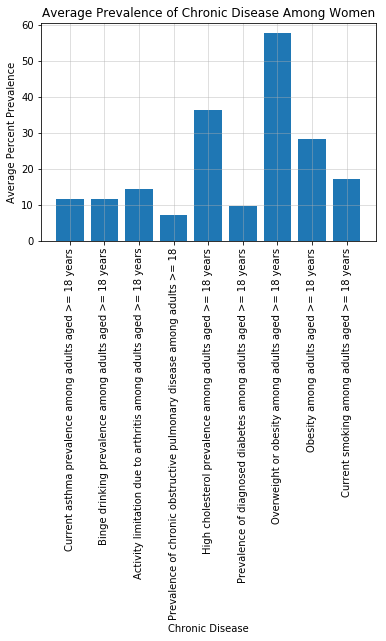

In [44]:
# Plot Time
# Prevalence graph for women
plt.bar(x_axis, avg_fem_prev_df[0], align='center')
plt.title("Average Prevalence of Chronic Disease Among Women")
plt.xlabel("Chronic Disease")
plt.ylabel("Average Percent Prevalence")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, prev_topics, rotation=90)
plt.grid(alpha=0.5)

plt.savefig("Resources/F_Prevalence.png")

In [38]:
avg_overall_prev_df = pd.DataFrame(op_dict, columns=prev_topics)
avg_overall_prev_df = avg_overall_prev_df.transpose()
avg_overall_prev_df

,0
Current asthma prevalence among adults aged >= 18 years,9.114444
Binge drinking prevalence among adults aged >= 18 years,16.985926
Activity limitation due to arthritis among adults aged >= 18 years,12.002469
Prevalence of chronic obstructive pulmonary disease among adults >= 18,6.458148
High cholesterol prevalence among adults aged >= 18 years,37.656790
Prevalence of diagnosed diabetes among adults aged >= 18 years,9.989259
Overweight or obesity among adults aged >= 18 years,64.093333
Obesity among adults aged >= 18 years,28.535926
Current smoking among adults aged >= 18 years,19.351111


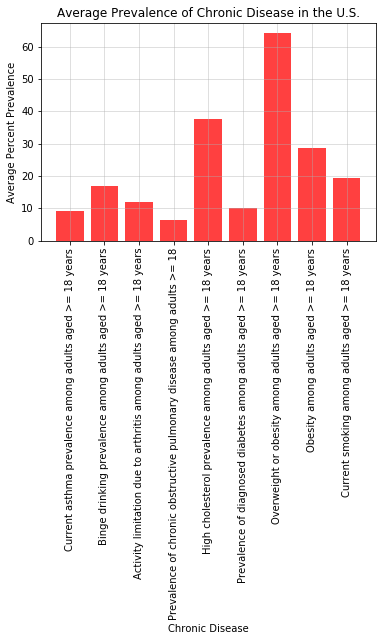

In [46]:
# Overall prevalence graph 
plt.bar(x_axis, avg_overall_prev_df[0], alpha=0.75, color='r', align='center')
plt.title("Average Prevalence of Chronic Disease in the U.S.")
plt.xlabel("Chronic Disease")
plt.ylabel("Average Percent Prevalence")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, prev_topics, rotation=90)
plt.grid(alpha=0.5)

plt.savefig("Resources/O_Prevalence.png")